In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tpot import TPOTClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost

from sklearn.metrics import roc_auc_score
import scikitplot as skplt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#valores estaticos
TEST_SIZE=0.20
RANDOM_STATE=42

In [3]:
df = pd.read_csv("../../data/processed/4.4/train/m1.0 - mes actual dumies - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df.info()

/home/seba/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268770 entries, 1690 to 21096072
Data columns (total 37 columns):
6m                               1268770 non-null int64
5m                               1268770 non-null int64
4m                               1268770 non-null int64
3m                               1268770 non-null int64
2m                               1268770 non-null int64
1m                               1268770 non-null int64
6m_rel                           1268770 non-null int64
5m_rel                           1268770 non-null int64
4m_rel                           1268770 non-null int64
3m_rel                           1268770 non-null int64
2m_rel                           1268770 non-null int64
1m_rel                           1268770 non-null int64
edad_r                           1268770 non-null int64
Churn                            1268770 non-null int64
GENDER_F                         1268770 non-null int64
GENDER_M                         1268770 no

In [4]:
#distrib de churn
np.sum(df["Churn"]) / len(df) * 100

1.7311254206830238

# Muestra random

In [5]:
msk = np.random.rand(len(df)) < 0.6

In [6]:
RANDOM_STATE=42
size = 0.6
"""
from sklearn.model_selection import StratifiedShuffleSplit


sss = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=RANDOM_STATE)
for train_index, val_index in sss.split(X,y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

"""

'\nfrom sklearn.model_selection import StratifiedShuffleSplit\n\n\nsss = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=RANDOM_STATE)\nfor train_index, val_index in sss.split(X,y):\n    X_train, X_val = X[train_index], X[val_index]\n    y_train, y_val = y[train_index], y[val_index]\n\n'

In [7]:
df[~msk]

,6m,5m,4m,3m,2m,1m,6m_rel,5m_rel,4m_rel,3m_rel,...,EDUCATION_LEVEL_SECUNDARIO,EDUCATION_LEVEL_TERCIARIO,EDUCATION_LEVEL_UNIVERSITARIO,ModoPago_BA,ModoPago_CC,ModoPago_Mix,ModoPago_PP,ModoPago_SJ,ModoPago_TA,ModoPago_TM
1690,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,2,1,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,2,1,1,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,2,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1690,1,1,1,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [8]:
df = df[msk]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761217 entries, 1690 to 21096072
Data columns (total 37 columns):
6m                               761217 non-null int64
5m                               761217 non-null int64
4m                               761217 non-null int64
3m                               761217 non-null int64
2m                               761217 non-null int64
1m                               761217 non-null int64
6m_rel                           761217 non-null int64
5m_rel                           761217 non-null int64
4m_rel                           761217 non-null int64
3m_rel                           761217 non-null int64
2m_rel                           761217 non-null int64
1m_rel                           761217 non-null int64
edad_r                           761217 non-null int64
Churn                            761217 non-null int64
GENDER_F                         761217 non-null int64
GENDER_M                         761217 non-null int64
MARI

In [9]:
#distrib de churn
np.sum(df["Churn"]) / len(df)

0.017227676207966978

# split data set

In [10]:
X = df.drop(columns=["Churn"], axis=1)
y = df["Churn"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [12]:
print("train: {} - test: {}".format(len(X_train), len(X_test)))

train: 608973 - test: 152244


In [13]:
#distrib de churn
np.sum(y_train) / len(y_train)

0.017196164690388573

In [14]:
X_train.head()

,6m,5m,4m,3m,2m,1m,6m_rel,5m_rel,4m_rel,3m_rel,...,EDUCATION_LEVEL_SECUNDARIO,EDUCATION_LEVEL_TERCIARIO,EDUCATION_LEVEL_UNIVERSITARIO,ModoPago_BA,ModoPago_CC,ModoPago_Mix,ModoPago_PP,ModoPago_SJ,ModoPago_TA,ModoPago_TM
18085228,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20949182,0,1,1,1,1,1,0,7,9,3,...,0,0,0,0,0,1,0,0,0,0
20638322,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3223247,2,3,3,3,3,3,7,14,18,7,...,0,0,0,0,0,1,0,0,0,0
5941225,2,2,2,2,2,2,3,7,3,5,...,0,0,0,0,0,1,0,0,0,0


# Modelo 1: ExtraTreesClassifier

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score


from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from tpot import TPOTClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier



from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [109]:
#meta parameters
param_range = [15]
param_range_fl = [1.0]
class_weight_range = [{0:1, 1:90}]
n_estimators = [10]

In [110]:
#initialize
grid_params = list()
pipe = list()
gs = list()
y_pred = list()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min finished


###################################
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', ExtraTreesClassifier(bootstrap=False, class_weight={0: 1, 1: 90},
           criterion='entropy', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_...estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False))])
Test set roc auc score for best params: 0.632 


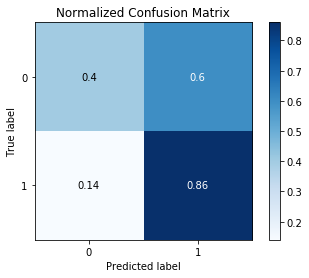

In [111]:

#parameters
grid_params.append([{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__min_samples_split': param_range,
                "clf__n_estimators" : n_estimators,
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesClassifier(random_state=RANDOM_STATE))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5


#model order
n = len(pipe) -1

gs.append(GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))



#pipelines scoring
gs[n].fit(X_train, y_train)
y_pred.append(gs[n].predict(X_test))
print("#"*35)
print(gs[n].best_estimator_)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred[n]))
skplt.metrics.plot_confusion_matrix(y_test, y_pred[n], normalize=True)
plt.show()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.9min finished


###################################
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 90},
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impur...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))])
Test set roc auc score for best params: 0.664 


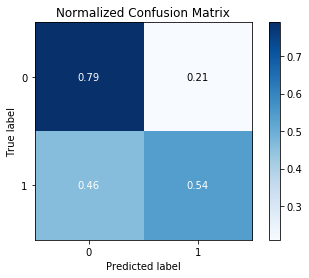

In [112]:

#parameters
grid_params.append([{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__min_samples_split': param_range,
                "clf__n_estimators" : n_estimators,
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=RANDOM_STATE))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5


#model order
n = len(pipe) -1

gs.append(GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))

#pipelines scoring
gs[n].fit(X_train, y_train)
y_pred.append(gs[n].predict(X_test))
print("#"*35)
print(gs[n].best_estimator_)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred[n]))
skplt.metrics.plot_confusion_matrix(y_test, y_pred[n], normalize=True)
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/seba/anaconda3

###################################
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight={0: 1, 1: 90},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])
Test set roc auc score for best params: 0.554 


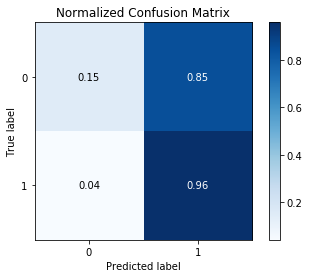

In [113]:

#parameters
grid_params.append([{'clf__penalty': ['l1'],
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([('scl', StandardScaler()),
                    ('clf', SGDClassifier(loss="hinge"))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5


#model order
n = len(pipe) -1


gs.append( GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))

#pipelines scoring
gs[n].fit(X_train, y_train)
y_pred.append(gs[n].predict(X_test))
print("#"*35)
print(gs[n].best_estimator_)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred[n]))
skplt.metrics.plot_confusion_matrix(y_test, y_pred[n], normalize=True)
plt.show()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished


###################################
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight={0: 1, 1: 90}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))])
Test set roc auc score for best params: 0.624 


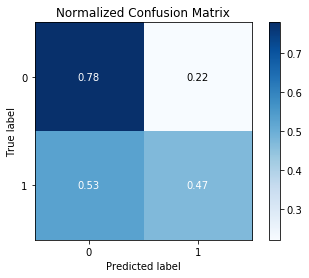

In [114]:
from sklearn.tree import DecisionTreeClassifier

#parameters
grid_params.append([{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__min_samples_split': param_range,
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state=RANDOM_STATE))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5

#model order
n = len(pipe) -1

gs.append( GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))

#pipelines scoring
gs[n].fit(X_train, y_train)
y_pred.append(gs[n].predict(X_test))
print("#"*35)
print(gs[n].best_estimator_)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred[n]))
skplt.metrics.plot_confusion_matrix(y_test, y_pred[n], normalize=True)
plt.show()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   45.6s finished


###################################
Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight={0: 1, 1: 90}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))])
Test set roc auc score for best params: 0.624 


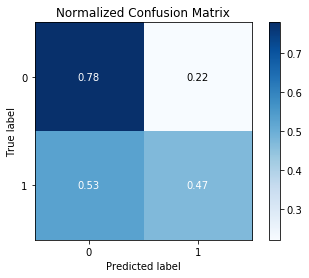

In [115]:
from sklearn.tree import DecisionTreeClassifier

#parameters
grid_params.append([{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__min_samples_split': param_range,
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([
                    ('clf', DecisionTreeClassifier(random_state=RANDOM_STATE))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5

#model order
n = len(pipe) -1

gs.append( GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))

#pipelines scoring
gs[n].fit(X_train, y_train)
y_pred.append(gs[n].predict(X_test))
print("#"*35)
print(gs[n].best_estimator_)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred[n]))
skplt.metrics.plot_confusion_matrix(y_test, y_pred[n], normalize=True)
plt.show()

# Ensemble by voting

In [89]:
from sklearn.ensemble import VotingClassifier

In [91]:
#meta parameters
param_range = [15]
param_range_fl = [1.0]
class_weight_range = [{0:1, 1:90}]
n_estimators = [10]

#initialize
grid_params = list()
pipe = list()
gs = list()
y_pred = list()

#parameters
grid_params.append([{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__min_samples_split': param_range,
                "clf__n_estimators" : n_estimators,
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesClassifier(random_state=RANDOM_STATE))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5


#model order
n = len(pipe) -1

gs.append(GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))


#parameters
grid_params.append([{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__min_samples_split': param_range,
                "clf__n_estimators" : n_estimators,
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=RANDOM_STATE))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5


#model order
n = len(pipe) -1

gs.append(GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))



#parameters
grid_params.append([{'clf__penalty': ['l1'],
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([('scl', StandardScaler()),
                    ('clf', SGDClassifier(loss="hinge"))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5


#model order
n = len(pipe) -1


gs.append( GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))

from sklearn.tree import DecisionTreeClassifier

#parameters
grid_params.append([{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__min_samples_split': param_range,
                'clf__class_weight' : class_weight_range}])


#pipelines
pipe.append(Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state=RANDOM_STATE))]))

#########################################
#### config
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 5

#model order
n = len(pipe) -1

gs.append( GridSearchCV(estimator=pipe[n],
            param_grid=grid_params[n],
            scoring=scoring,
            cv=cv,
            verbose=1,
            refit="AUC",
            n_jobs=jobs))





Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.4min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.2min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/seba/anaconda3

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished
/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


###################################
Test set roc auc score for best params: 0.665 


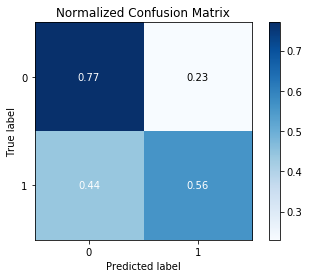

In [103]:
modelos = [('ExtTree', gs[0]), ('RandFor', gs[1]), ('SGD', gs[2]), ('DecTree', gs[3])]
#hard voting
eclf_hard = VotingClassifier(estimators=modelos, voting='hard')

#predict test / overfitting
eclf_hard.fit(X_train, y_train)
y_pred_ens = eclf_hard.predict(X_test)
print("#"*35)
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred_ens))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ens, normalize=True)
plt.show()

In [106]:
#evaluación contra el testeo externo
df_testo_ext = pd.read_csv("../../data/processed/4.4/test_cliente/m1.0 - mes actual dummies - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_testo_ext.info()

X_testo_ext = df_testo_ext.drop("Churn", axis=1)
y_testeo_ext = df_testo_ext["Churn"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39102 entries, 1690 to 20609007
Data columns (total 37 columns):
6m                               39102 non-null float64
5m                               39102 non-null float64
4m                               39102 non-null float64
3m                               39102 non-null float64
2m                               39102 non-null float64
1m                               39102 non-null float64
edad_r                           39102 non-null float64
6m_rel                           39102 non-null float64
5m_rel                           39102 non-null float64
4m_rel                           39102 non-null float64
3m_rel                           39102 non-null float64
2m_rel                           39102 non-null float64
1m_rel                           39102 non-null float64
Churn                            39102 non-null int64
GENDER_F                         39102 non-null int64
GENDER_M                         39102 non-null i

0.5699478490160108


/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


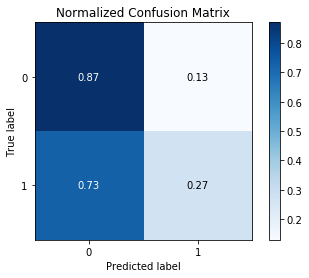

In [107]:
y_pred_testeo_ext = eclf_hard.predict(X_testo_ext)
print(roc_auc_score(y_testeo_ext, y_pred_testeo_ext))
skplt.metrics.plot_confusion_matrix(y_testeo_ext, y_pred_testeo_ext, normalize=True)

In [ ]:
#soft voting
eclf_soft = VotingClassifier(estimators=best_m, voting='soft', weights=[2,1,2])


[Pipeline(memory=None,
      steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight={0: 1, 1: 90},
        epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
        n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
        shuffle=True, tol=None, verbose=0, warm_start=False))]),
 Pipeline(memory=None,
      steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight={0: 1, 1: 90}, criterion='gini',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=15,
             min_weight_fraction_leaf=0.0, presort=False, random_state=42,
             splitter='best'))])]

In [21]:
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



# #############################################################################
# configs

class_weight = [{0:1, 1:35}]


# #############################################################################
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.roc_auc_score(y_test, pred)
    print("roc_auc_score:   %0.3f" % score)
    
    #score = metrics.roc_curve(y_test, pred)
    #print("accuracy:   %0.3f" % score)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr", random_state=RANDOM_STATE), "Ridge Classifier"),
        (Perceptron(n_iter=50 , random_state=RANDOM_STATE), "Perceptron"),
        (PassiveAggressiveClassifier(n_iter=50 , random_state=RANDOM_STATE), "Passive-Aggressive"),
        (DecisionTreeClassifier(max_depth=None, min_samples_split=10,random_state=RANDOM_STATE), "DecisionTree"),
        (RandomForestClassifier(n_estimators=100, class_weight=class_weight, random_state=RANDOM_STATE), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=42, solver='lsqr',
        tol=0.01)
train time: 0.691s
test time:  0.026s
roc_auc_score:   0.500

Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=50, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)


/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 7.875s
test time:  0.014s
roc_auc_score:   0.500

Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=50,
              n_jobs=1, random_state=42, shuffle=True, tol=None, verbose=0,
              warm_start=False)


/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 8.702s
test time:  0.015s
roc_auc_score:   0.500

DecisionTree
________________________________________________________________________________
Training: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
train time: 8.884s
test time:  0.047s
roc_auc_score:   0.503

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=[{0: 1, 1: 35}],
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,


ValueError: class_weight must be dict, 'balanced', or None, got: [{0: 1, 1: 35}]

In [ ]:
n_component = 5

class_weight_range = [{0:1, 1:20},{0:1, 1:25},{0:1, 1:30},{0:1, 1:35}]

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=RANDOM_STATE))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=n_component)),
			('clf', LogisticRegression(random_state=RANDOM_STATE))])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=RANDOM_STATE))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=n_component)),
			('clf', RandomForestClassifier(random_state=RANDOM_STATE))])

pipe_svm = Pipeline([('scl', StandardScaler()),
			('clf', svm.SVC(random_state=RANDOM_STATE))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=n_component)),
			('clf', svm.SVC(random_state=RANDOM_STATE))])
			
# Set grid search params
#aram_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range = [2, 3, 4, 7, 10]
param_range_fl = [1.0, 0.5, 0.1]
#aram_range_fl = np.power(10., np.arange(-4, 4))

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear'],
    'clf__class_weight' : class_weight_range}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:],
    'clf__class_weight' : class_weight_range}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range,
    'clf__class_weight' : class_weight_range}]

# Construct grid searches
# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
scoring_refit = "AUC"
cv = 3

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring=scoring,
            refit=scoring_refit,
			cv=cv) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring=scoring,
      refit=scoring_refit,
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring=scoring,
      refit=scoring_refit,
			cv=cv, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring=scoring,
      refit=scoring_refit,
			cv=cv, 
			n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring=scoring,
      refit=scoring_refit,
			cv=cv,
			n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
			param_grid=grid_params_svm,
			scoring=scoring,
      refit=scoring_refit,
			cv=cv,
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr]#, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA', 
		4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing model optimizations...

Estimator: Logistic Regression


In [51]:
#modelo sin optimizar de prueba
"""
class_weight = dict({0:1, 1:30})
clf = ExtraTreesClassifier(class_weight=class_weight,
                            criterion='gini', max_depth=None, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=20,
                            min_samples_split=6, min_weight_fraction_leaf=0.0,
                            n_estimators=10,
                            n_jobs=-1, random_state=RANDOM_STATE)

clf.fit(X_train, y_train)
"""

ExtraTreesClassifier(bootstrap=False, class_weight={0: 1, 1: 30},
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [ ]:
print(clf.score(X_test, y_test))
yp = clf.predict_proba(X_test)
roc_auc_score(y_test, yp[:,1])

In [53]:
res = pd.DataFrame()
res["y"] = y_test
res["yp"] = yp[:,1]

In [54]:
res["dif"] = res["y"] - res["yp"]
res["dif"] = res["dif"].apply(abs)
res.sort_values(by="dif", ascending=False, inplace=True)

In [57]:
res[(res.y == 1) & (res.dif < 0.3)]

,y,yp,dif
11083853,1,0.700994,0.299006
21010433,1,0.701717,0.298283
19838605,1,0.701783,0.298217
19026967,1,0.703089,0.296911
16750735,1,0.704548,0.295452
1539600,1,0.704978,0.295022
19323147,1,0.706404,0.293596
2331203,1,0.706404,0.293596
20570379,1,0.708412,0.291588
17938771,1,0.715278,0.284722


Test set roc auc score for best params: 0.500 


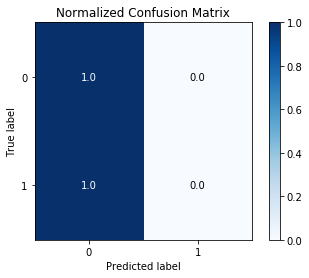

In [20]:
y_pred = clf.predict(X_test)

print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred))

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [23]:
#evaluación contra el testeo externo
df_testo_ext = pd.read_csv("../../data/processed/4.4/test_cliente/m1.0 - mes actual dummies - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_testo_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39102 entries, 1690 to 20609007
Data columns (total 37 columns):
6m                               39102 non-null float64
5m                               39102 non-null float64
4m                               39102 non-null float64
3m                               39102 non-null float64
2m                               39102 non-null float64
1m                               39102 non-null float64
edad_r                           39102 non-null float64
6m_rel                           39102 non-null float64
5m_rel                           39102 non-null float64
4m_rel                           39102 non-null float64
3m_rel                           39102 non-null float64
2m_rel                           39102 non-null float64
1m_rel                           39102 non-null float64
Churn                            39102 non-null int64
GENDER_F                         39102 non-null int64
GENDER_M                         39102 non-null i

In [24]:
X_testo_ext = df_testo_ext.drop("Churn", axis=1)
y_testeo_ext = df_testo_ext["Churn"]

In [25]:
y_pred_testeo_ext = clf.predict(X_testo_ext)
roc_auc_score(y_testeo_ext, y_pred_testeo_ext)

0.5

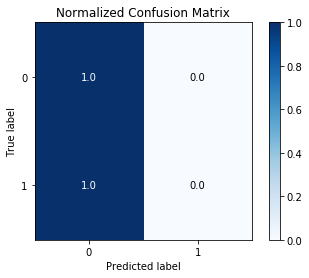

In [26]:
skplt.metrics.plot_confusion_matrix(y_testeo_ext, y_pred_testeo_ext, normalize=True)

# Optimizando parametros

In [12]:
#param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range = [6, 8, 12]
param_range_fl = [1.0, 0.5, 0.1]
class_weight_range = [{0:1, 1:10},{0:1, 1:20},{0:1, 1:25}]
#param_range_fl = np.power(10., np.arange(-4, 4))


#'clf__max_depth': param_range,
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__min_samples_split': param_range,
    'clf__class_weight' : class_weight_range}]

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=RANDOM_STATE))])

# Construct grid searches
jobs = -1
#scoring = "roc_auc"
#scoring = "roc_auc" #http://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
cv = 3

#refit=True, entrena el mejor modelo obtenido con todo el dataset! :D
#verbose => mientras mayor el número, más info va mostrando.
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring=scoring,
            cv=cv,
            verbose=2,
            refit="AUC",
            n_jobs=jobs)
gs_rf

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...timators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'clf__criterion': ['gini', 'entropy'], 'clf__min_samples_leaf': [6, 8, 12], 'clf__min_samples_split': [6, 8, 12], 'clf__class_weight': [{0: 1, 1: 10}, {0: 1, 1: 20}, {0: 1, 1: 25}]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
       verbose=2)

In [13]:
# Fit grid search	
gs_rf.fit(X_train, y_train)
# Best params
print('Best params: %s' % gs_rf.best_params_)
# Best training data roc auc
print('Best training roc auc: %.3f' % gs_rf.best_score_)
# Predict on test data with best params
y_pred_gs_rf = gs_rf.predict(X_test)
# Test data roc auc of model with best params
print('Test set roc auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred_gs_rf))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6 
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6 
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6 
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 10}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6, total=  22.3s
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 10}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6, total=  23.2s
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 

[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=6 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.1min


[CV]  clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=12, total=  23.5s
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=12, total=  25.6s
[CV]  clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  26.8s
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=6 
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=6, total=  26.1s
[CV] clf__class_weight={0: 1, 1: 10}, clf__criterion=entropy, clf__min_samples_leaf=8, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 

[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=12 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=8, total=  26.2s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=12, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=12, total=  25.5s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=12, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=12, total=  26.4s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=12, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=gini, clf__min_samples_leaf=8, clf__min_samples_split=12, total=  25.8s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=

[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=8, total=  24.2s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=12 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=8, total=  24.8s
[CV] clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=12 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=8, total=  23.5s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1: 20}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=12, total=  23.7s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=gini, clf__min_samples_leaf=6, clf__min_samples_split=6 
[CV]  clf__class_weight={0: 1, 1:

[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=6, total=  26.4s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=12 
[CV]  clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  24.7s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=12 
[CV]  clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  26.2s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=12 
[CV]  clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=6, clf__min_samples_split=8, total=  26.3s
[CV] clf__class_weight={0: 1, 1: 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.6min


[CV]  clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=6, total=  25.2s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=8 
[CV]  clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=6, total=  26.4s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=12 
[CV]  clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=8, total=  25.6s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=12 
[CV]  clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=8, total=  24.3s
[CV] clf__class_weight={0: 1, 1: 25}, clf__criterion=entropy, clf__min_samples_leaf=12, clf__min_samples_split=12 
[CV]  clf__class_weight={

[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 22.4min finished


Best params: {'clf__class_weight': {0: 1, 1: 25}, 'clf__criterion': 'gini', 'clf__min_samples_leaf': 12, 'clf__min_samples_split': 6}
Best training roc auc: 0.881
Test set roc auc score for best params: 0.825 


/home/seba/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


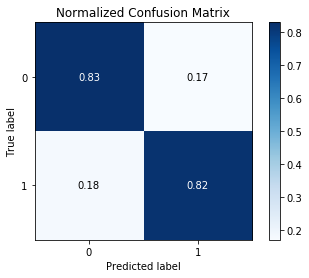

In [14]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_gs_rf, normalize=True)

In [15]:
#evaluación contra el testeo externo
df_testo_ext = pd.read_csv("../../data/processed/testeo/m1.0 - churn estricto - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_testo_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1690 to 21260067
Data columns (total 56 columns):
6m                                50000 non-null int64
5m                                50000 non-null int64
4m                                50000 non-null int64
3m                                50000 non-null int64
2m                                50000 non-null int64
1m                                50000 non-null int64
Churn                             50000 non-null int64
edad_r                            50000 non-null int64
GENDER_F                          50000 non-null int64
GENDER_M                          50000 non-null int64
MARITAL_STATUS_Casado             50000 non-null int64
MARITAL_STATUS_Conviv             50000 non-null int64
MARITAL_STATUS_Divorciado         50000 non-null int64
MARITAL_STATUS_No Corresp         50000 non-null int64
MARITAL_STATUS_Separado           50000 non-null int64
MARITAL_STATUS_Soltero            50000 non-null int64
MARIT

In [16]:
X_testo_ext = df_testo_ext.drop("Churn", axis=1)
y_testeo_ext = df_testo_ext["Churn"]

In [17]:
X_testo_ext.head()

,6m,5m,4m,3m,2m,1m,edad_r,GENDER_F,GENDER_M,MARITAL_STATUS_Casado,...,CITY_SANTIAGO DEL ESTERO,CITY_TIERRA DEL FUEGO,CITY_TUCUMAN,ModoPago_BA,ModoPago_CC,ModoPago_Mix,ModoPago_PP,ModoPago_SJ,ModoPago_TA,ModoPago_TM
1690,0,0,0,0,0,0,5,0,1,1,...,0,0,0,0,1,0,0,0,0,0
5575,2,2,2,2,2,1,4,0,1,1,...,0,0,0,0,0,1,0,0,0,0
7968,2,2,2,2,2,2,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
9028,2,2,2,2,2,2,4,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9860,1,1,1,1,1,0,4,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
clf = gs_rf.best_estimator_
clf

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 25},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))])

In [19]:
y_pred_testeo_ext = clf.predict(X_testo_ext)

In [20]:
roc_auc_score(y_testeo_ext, y_pred_testeo_ext)

0.6903824356150207

/home/seba/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


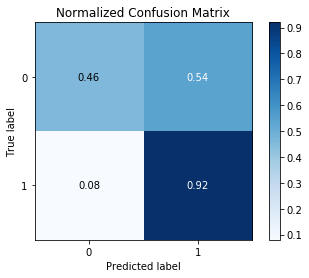

In [21]:
skplt.metrics.plot_confusion_matrix(y_testeo_ext, y_pred_testeo_ext, normalize=True)

In [22]:
gs_rf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 25},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))])

In [23]:
#bajando el modelo
from sklearn.externals import joblib

joblib.dump(gs_rf.best_estimator_, '../../models/M1.1 - Modelo RandomForest (0.-0.) - Churn estricto- 6m.N.polizaXmes y Info.Cliente.M.Pago.pkl')

['../../models/M1.1 - Modelo RandomForest (0.-0.) - Churn estricto- 6m.N.polizaXmes y Info.Cliente.M.Pago.pkl']

# Realizando predicción para entregar

In [64]:
df_pred = pd.read_csv("../../data/processed/test_cliente/m1.0 - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv", index_col="Unnamed: 0")
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1690 to 21260067
Data columns (total 55 columns):
6m                                50000 non-null int64
5m                                50000 non-null int64
4m                                50000 non-null int64
3m                                50000 non-null int64
2m                                50000 non-null int64
1m                                50000 non-null int64
edad_r                            50000 non-null int64
GENDER_F                          50000 non-null int64
GENDER_M                          50000 non-null int64
MARITAL_STATUS_Casado             50000 non-null int64
MARITAL_STATUS_Conviv             50000 non-null int64
MARITAL_STATUS_Divorciado         50000 non-null int64
MARITAL_STATUS_No Corresp         50000 non-null int64
MARITAL_STATUS_Separado           50000 non-null int64
MARITAL_STATUS_Soltero            50000 non-null int64
MARITAL_STATUS_Union Civ          50000 non-null int64
MARIT

In [65]:
y_pred_predFin  = gs_rf.best_estimator_.predict_proba(df_pred)

In [95]:
csv = pd.DataFrame()
csv["CUSTOMER_ID"] = df_pred.index.values
csv["PRED"] = pd.DataFrame(y_pred_predFin)[1]
csv.set_index("CUSTOMER_ID", inplace=True)
csv.head()

,CUSTOMER_ID,PRED
0,1690,0.006911
1,5575,0.096964
2,7968,0.134929
3,9028,0.035026
4,9860,0.010475


In [96]:
csv.to_csv("../../data/processed/prediccion_para_cliente/m1.0 - predict - 6m.N.polizaXmes y Info.Cliente.M.Pago.csv")